In [5]:
from src.common import *
from src.houses import *
from src.agents import *
from src.bidding import *
from src.sim import *

In [ ]:
agents, houses, stats, last_round = sim_one_round(n_agents=1_000_000, max_rounds=100, happiness_percent=0.5, converge=True, lambda_ = 0.25)

In [ ]:
agents, houses, mc_stats, last_round = monte_carlo_sim(n_agents=1_000_000, max_rounds=100, n_runs = 30, happiness_percent=0.5)

# wsl:     103 mins 13.7s = 6193.7 secs => 3m 26.4s avg
# windows: 111 mins 43.2s = 6703.2 secs => 3m 43.4s avg
# wsl is ~7.6% faster
# windows is ~8.2% slower

In [ ]:
# visualize the segregation taking place
plot_segregation_grid(stats, last_round)

In [ ]:
# makes the above into a gif
create_segregation_animation(stats, last_round)

In [ ]:
# houses with no tenants is slightly off still but much better than before
no_house = np.sum(agents["house"]==-1)
no_tenant = np.sum(houses["tenant"]==-1)
homeless = np.sum(agents["neighborhood"]==-1)
nonmarket_housing = np.sum(agents["nonmarket_housing"])
happy = np.sum(agents["happy"])
# first three should match
# homeless should be zero
print(f"Agents with no house: {no_house}")
print(f"Houses with no tenants: {no_tenant}")
print(f"Agents living in nonmarket housing = {nonmarket_housing}")
print(f"Homeless agents (neighborhood = -1): {homeless}")
print(f"Happy agents: {happy}")

In [ ]:
n_neighborhoods = np.max(agents["neighborhood"]) + 1
plot_stats(stats, agents, houses, n_neighborhoods, last_round)

In [ ]:
agents, houses, mc_stats, last_round = monte_carlo_sim(n_agents = 10_000, max_rounds = 1000, n_runs = 30)

In [ ]:
plot_mc_stats(mc_stats, last_round)

In [7]:
all_results = parameter_sweep(n_runs = 20, params = ["beta", "lambda_"], sensitivity=100)

Running sim at beta = 0.0500, 1/100
Running run 1

Running run 2

Running run 3

Running run 4

Running run 5

Running run 6

Running run 7

Running run 8

Running run 9

Running run 10

Running run 11

Running run 12

Running run 13

Running run 14

Running run 15

Running run 16

Running run 17

Running run 18

Running run 19

Running run 20

Happiness: 27.079998% ± 1.21
Nonmarket housing: 72.920% ± 1.21

Running sim at beta = 0.0591, 2/100
Running run 1

Running run 2

Running run 3

Running run 4

Running run 5

Running run 6

Running run 7

Running run 8

Running run 9

Running run 10

Running run 11

Running run 12

Running run 13

Running run 14

Running run 15

Running run 16

Running run 17

Running run 18

Running run 19

Running run 20

Happiness: 24.577000% ± 1.14
Nonmarket housing: 74.413% ± 1.14

Running sim at beta = 0.0682, 3/100
Running run 1

Running run 2

Running run 3

Running run 4

Running run 5

Running run 6

Running run 7

Running run 8

Running run 9

Running

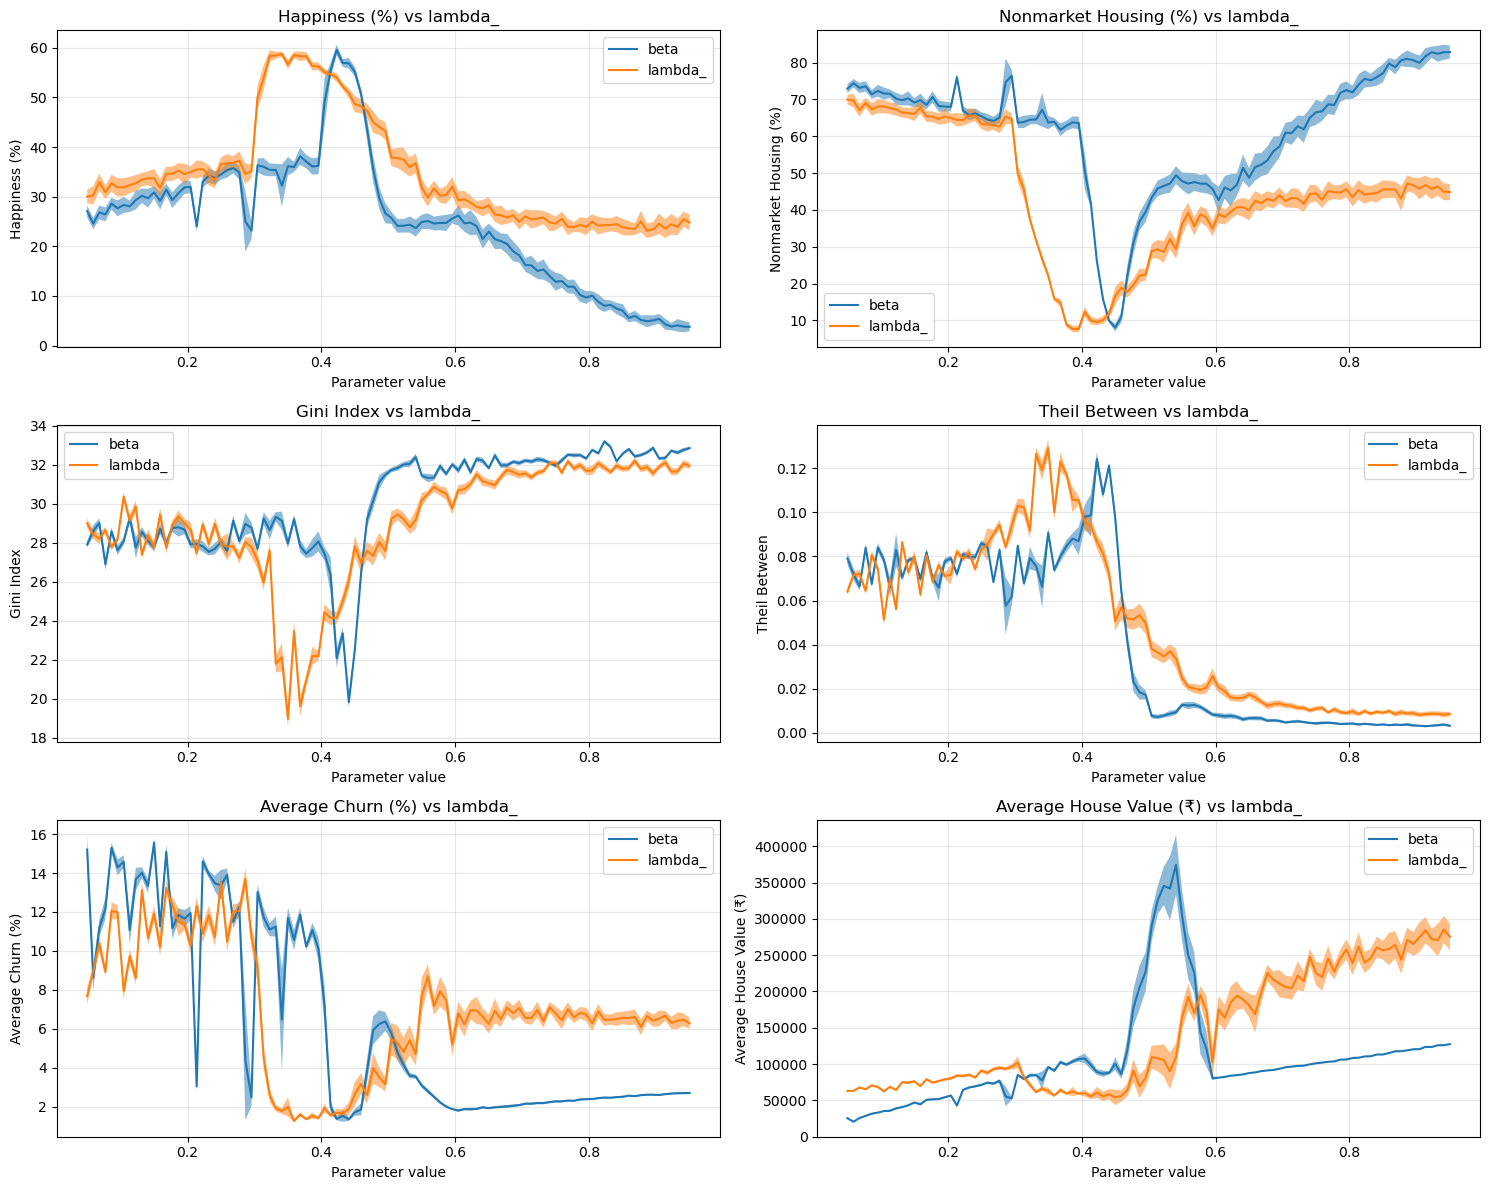

In [8]:
plot_parameter_sweep(all_results)